In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics


In [2]:
csv_data = pd.read_csv('database_8f.csv')

In [3]:
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行

In [4]:
'''label_name = {
    0:'success',
    1:'fail',
    2:'noExtusion'
}

csv_data['label'] = csv_data['label'].map(label_name)   #將label的0 1 2置換成列印狀態
'''
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,7,4.218388,0.658659,3.568960,1.000000,0.000000,0.000000,1.000000,0
1,7,4.039544,0.664035,3.490376,1.000000,0.000000,0.000000,1.000000,0
2,24,12.329679,0.734958,5.047266,1.000000,0.000000,0.000000,1.000000,0
3,10,10.854882,0.676083,4.867942,1.000000,0.000000,0.000000,1.000000,0
4,11,8.830020,0.640324,4.548501,1.000000,0.000000,0.000000,1.000000,0
5,10,10.374794,0.669042,4.671535,1.000000,0.000000,0.000000,1.000000,0
6,11,18.659241,0.725560,5.227786,1.000000,0.000000,0.000000,1.000000,0
7,7,4.420097,0.720220,3.611113,1.000000,0.000000,0.000000,1.000000,0
8,6,5.418079,0.758399,3.899330,1.000000,0.000000,0.000000,1.000000,0
9,6,4.433054,0.732694,3.631464,1.000000,0.000000,0.000000,1.000000,0


In [5]:
# 判斷是否重複
csv_data.duplicated()
#移除重複數據
csv_data = csv_data.drop_duplicates()
csv_data

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,7,4.218388,0.658659,3.568960,1.000000,0.000000,0.000000,1.000000,0
1,7,4.039544,0.664035,3.490376,1.000000,0.000000,0.000000,1.000000,0
2,24,12.329679,0.734958,5.047266,1.000000,0.000000,0.000000,1.000000,0
3,10,10.854882,0.676083,4.867942,1.000000,0.000000,0.000000,1.000000,0
4,11,8.830020,0.640324,4.548501,1.000000,0.000000,0.000000,1.000000,0
5,10,10.374794,0.669042,4.671535,1.000000,0.000000,0.000000,1.000000,0
6,11,18.659241,0.725560,5.227786,1.000000,0.000000,0.000000,1.000000,0
7,7,4.420097,0.720220,3.611113,1.000000,0.000000,0.000000,1.000000,0
8,6,5.418079,0.758399,3.899330,1.000000,0.000000,0.000000,1.000000,0
9,6,4.433054,0.732694,3.631464,1.000000,0.000000,0.000000,1.000000,0


In [6]:
display(csv_data.describe())      #使用describe()函數查看每一列的描述性統計量

,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
count,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000,36807.000000
mean,88.818920,21.511299,0.398281,5.116770,0.719577,0.070056,0.559147,0.965003,0.674057
std,62.582484,17.369348,0.402660,0.965350,0.251420,0.072683,0.484133,0.036301,0.695438
min,0.000000,2.161411,0.016316,1.996114,0.173564,0.000000,0.000000,0.811594,0.000000
25%,12.000000,7.160578,0.100237,4.303568,0.478168,0.000000,0.000000,0.943841,0.000000
50%,112.000000,16.586874,0.200626,5.212415,0.750158,0.048913,0.548345,0.975543,1.000000
75%,137.000000,29.240006,0.608145,5.844652,1.000000,0.112319,0.958206,1.000000,1.000000
max,193.000000,100.997025,1.979039,7.211319,1.000000,0.376812,1.852443,1.000000,2.000000


### 將資料分為訓練與測試

In [7]:
from sklearn.model_selection import train_test_split
'''
#數據打亂
from sklearn.utils import shuffle
csv_data = shuffle(csv_data)
print(csv_data)
'''
Features = csv_data.drop('label',axis=1)             
Label = csv_data['label']
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.1, random_state=0) #分割1成測試就好
#將序列重排
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


### 資料前處理

In [8]:
import sklearn.preprocessing 

def train_preprocess(X):
    # imputation
    pass
    
    return X

#for testing data
def test_preprocess(X):
     # imputation
    pass
    
    return X

###  進行validation 將資料分為五等分    其中四等拿來train 一等拿來test  ,故可訓練出五種分類器

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline

k_fold = StratifiedKFold(n_splits=5,shuffle = True, random_state=42)  #分层抽样（stratified sampling）来生成数据
model = SVC(C = 200 ,kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovo',gamma = 0.01)


In [10]:
accuracies = []
confmats = []
Features = X_train                  
Label = y_train


for train_index, test_index in k_fold.split(Features,Label):
    #training
    X = Features.loc[train_index]
    y = Label.loc[train_index]         
    X_preprocess = train_preprocess(X)
    trained = model.fit(X_preprocess, y)
    
    #testing
    X = Features.loc[test_index]
    y = Label.loc[test_index]         
    X_preprocess = test_preprocess(X)
    accuracies.append(trained.score(X_preprocess, y))
    y_pred = model.predict(X_preprocess)
    confmats.append(metrics.confusion_matrix(y, y_pred))
    

In [11]:
accuracies  #五個模型的準確度

[0.9351139278708315,
 0.9411409598551163,
 0.9452075471698114,
 0.9445954106280193,
 0.9373490338164251]

In [12]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))              #沒有作特徵判斷的話  0.941756
print("標準差 = {:f}".format(np.std(acc)))                  #                  0.006991

平均值 = 0.940681
標準差 = 0.003953


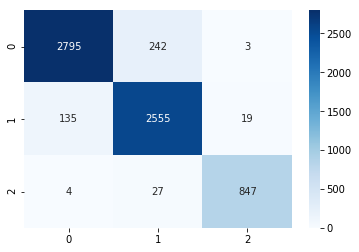

In [13]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

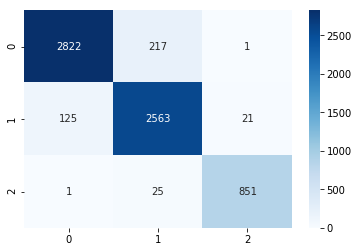

In [14]:
sns.heatmap(confmats[1], cmap="Blues", annot=True, fmt="d")

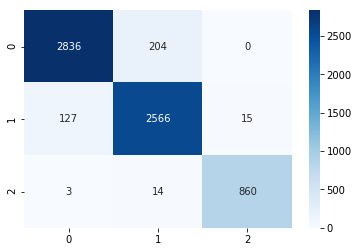

In [15]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

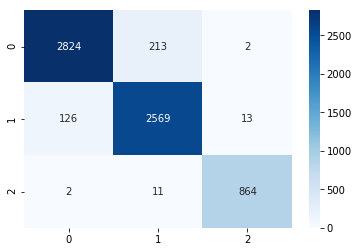

In [16]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

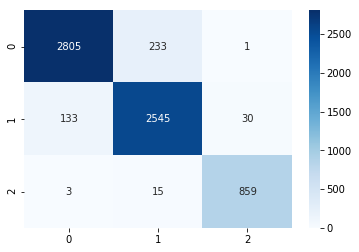

In [17]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")

###  套入測試資料

In [18]:
#testing
X = X_test
y = y_test       
X_preprocess = test_preprocess(X)
print(trained.score(X_preprocess, y))
    

0.9367019831567509


## 探索資料

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


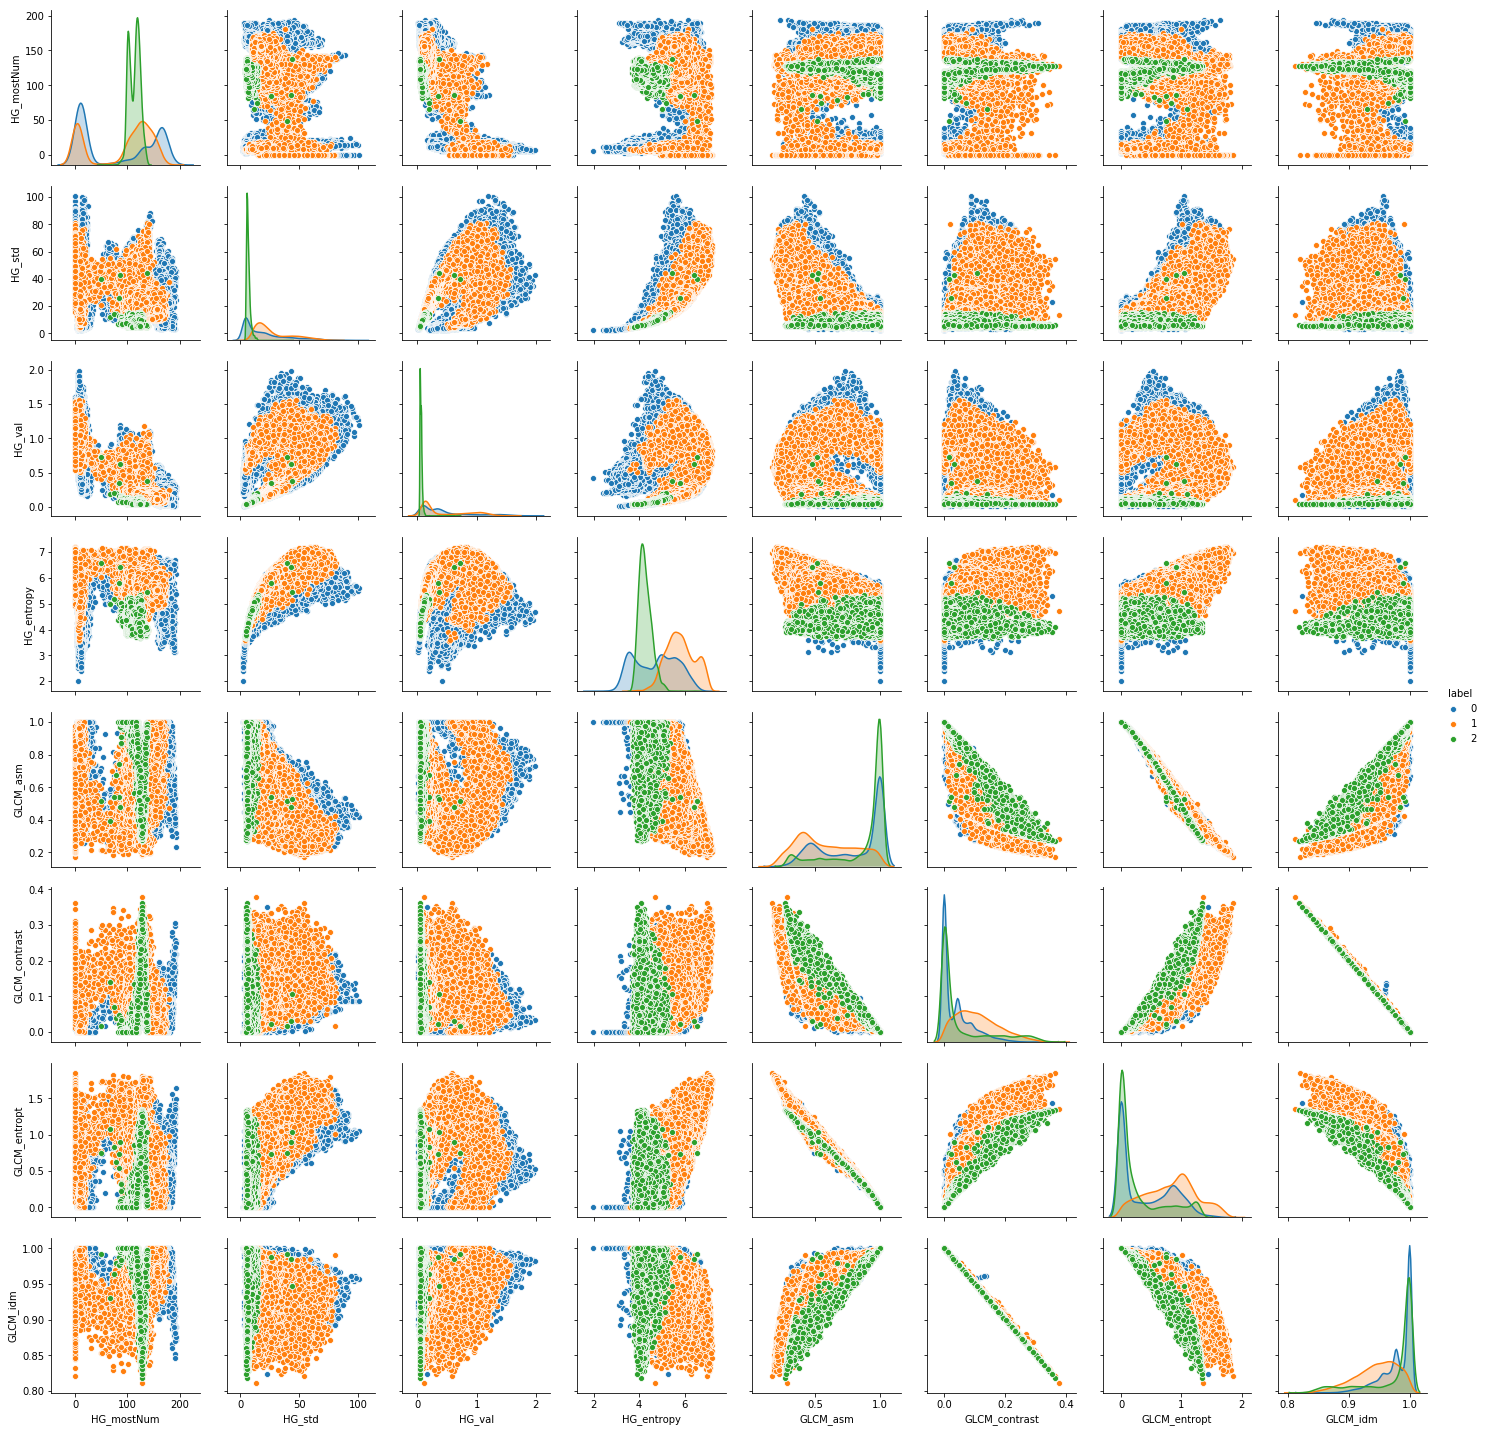

In [19]:
show_features = ["HG_mostNum", "HG_std", "HG_val", "HG_entropy","GLCM_asm","GLCM_contrast","GLCM_entropt","GLCM_idm"]
sns.pairplot(data=csv_data, hue="label", x_vars=show_features, y_vars=show_features)

### 挑選了有辦法肉眼分類的特徵來當作我們訓練用的特徵 :
###  HG_entropy於 GLCM_asm , GLCM_entropy , GLCM_asm，GLCM_idm(可肉眼分三類) 
###  HG_std  於  HG_entropy , GLCM_asm

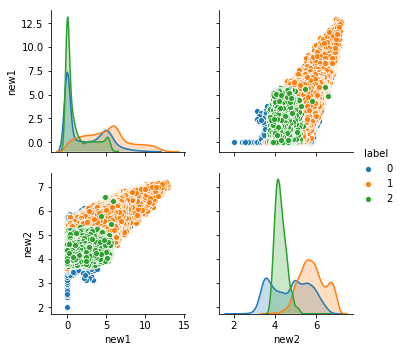

In [59]:
csv_data['new1'] = (csv_data["HG_entropy"] * csv_data["GLCM_entropt"]) 
csv_data['new2'] = csv_data['HG_entropy']
show_features = ["new1", "new2"]
sns.pairplot(data=csv_data, hue="label", x_vars=show_features, y_vars=show_features)



In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline


#分割資料
from sklearn.model_selection import train_test_split
'''
#數據打亂
from sklearn.utils import shuffle
csv_data = shuffle(csv_data)
print(csv_data)
'''
features = ["new1","HG_mostNum", "HG_val","GLCM_asm","GLCM_contrast","GLCM_idm"]  #要計算的特徵資料 
Features = csv_data[features]
Label = csv_data['label']
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.1, random_state=0) #分割1成測試就好
#將序列重排
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


k_fold_new = StratifiedKFold(n_splits=5,shuffle = True, random_state=42)  #分层抽样（stratified sampling）来生成数据
model = SVC(C = 200 ,kernel = 'rbf',random_state=0 ,decision_function_shape = 'ovo',gamma = 0.01)

In [61]:
accuracies = []
confmats = []
Features = X_train                  
Label = y_train


for train_index, test_index in k_fold_new.split(Features,Label):
    #training
    X = Features.loc[train_index]
    y = Label.loc[train_index]         
    X_preprocess = train_preprocess(X)
    trained = model.fit(X_preprocess, y)
    
    #testing
    X = Features.loc[test_index]
    y = Label.loc[test_index]         
    X_preprocess = test_preprocess(X)
    accuracies.append(trained.score(X_preprocess, y))
    y_pred = model.predict(X_preprocess)
    confmats.append(metrics.confusion_matrix(y, y_pred))

In [62]:
accuracies

[0.9019164025954429,
 0.9077875037730154,
 0.8990188679245283,
 0.903683574879227,
 0.9033816425120773]

In [53]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))              #0.953747
print("標準差 = {:f}".format(np.std(acc)))                  #0.003545

平均值 = 0.924350
標準差 = 0.003836


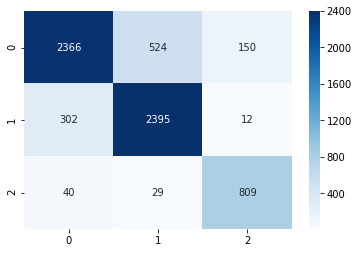

In [23]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

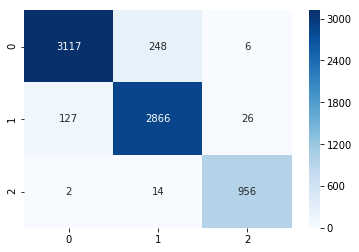

In [24]:
sns.heatmap(confmats[1], cmap="Blues", annot=True, fmt="d")

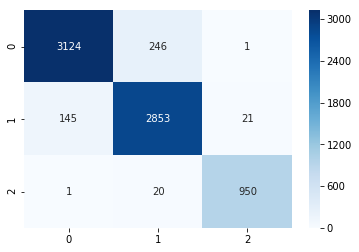

In [25]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

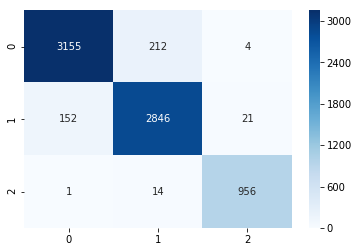

In [26]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

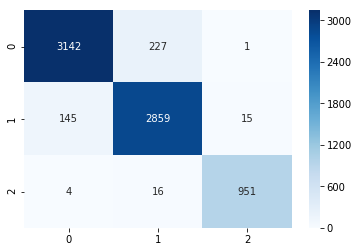

In [27]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")